In [11]:

import settings
import mysql.connector
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="!Parth1470",
    database="TweetifyDB1",
    charset = 'utf8'
)

Apple Negative Tweets Monitor: 
  2021-04-11 04:51:05  Buying an apple charger has probably been one of the worst investment Ive ever done

I BOUGHT THIS ONE A YEAR AGO, https://t.co/bsZfwWTtc6
  2021-04-11 04:51:56  *Stares at Apple Juice's corpse. Menacingly.*
  2021-04-11 04:52:10  Ill float out my flip flops rn https://t.co/F9jF7h4PxL
  2021-04-11 04:52:49  Rep. Crenshaw says he will be temporarily blind after emergency eye surgery - POLITICO https://t.co/pfCCMJt85q
  2021-04-11 04:52:54  id feel like a bad bitch doing homework on that
  2021-04-11 04:53:37  shuffle goin crazy tn  https://t.co/OUak8VA8g9
  2021-04-11 04:53:55  Loneliness, Anxiety and Loss: the Covid Pandemics Terrible Toll on Kids - The Wall Street Journal  https://t.co/ctYQFzn75G
  2021-04-11 04:53:59  RT @SirRobArtII1: In reality, Ill make a lot of money when #XRP hits $10 and buy nothing. No car, no home, apartment, fancy watch. Ill ju
  2021-04-11 04:54:28  @NYMike1991 I feel bad for Apple fanboys now
  2021-04

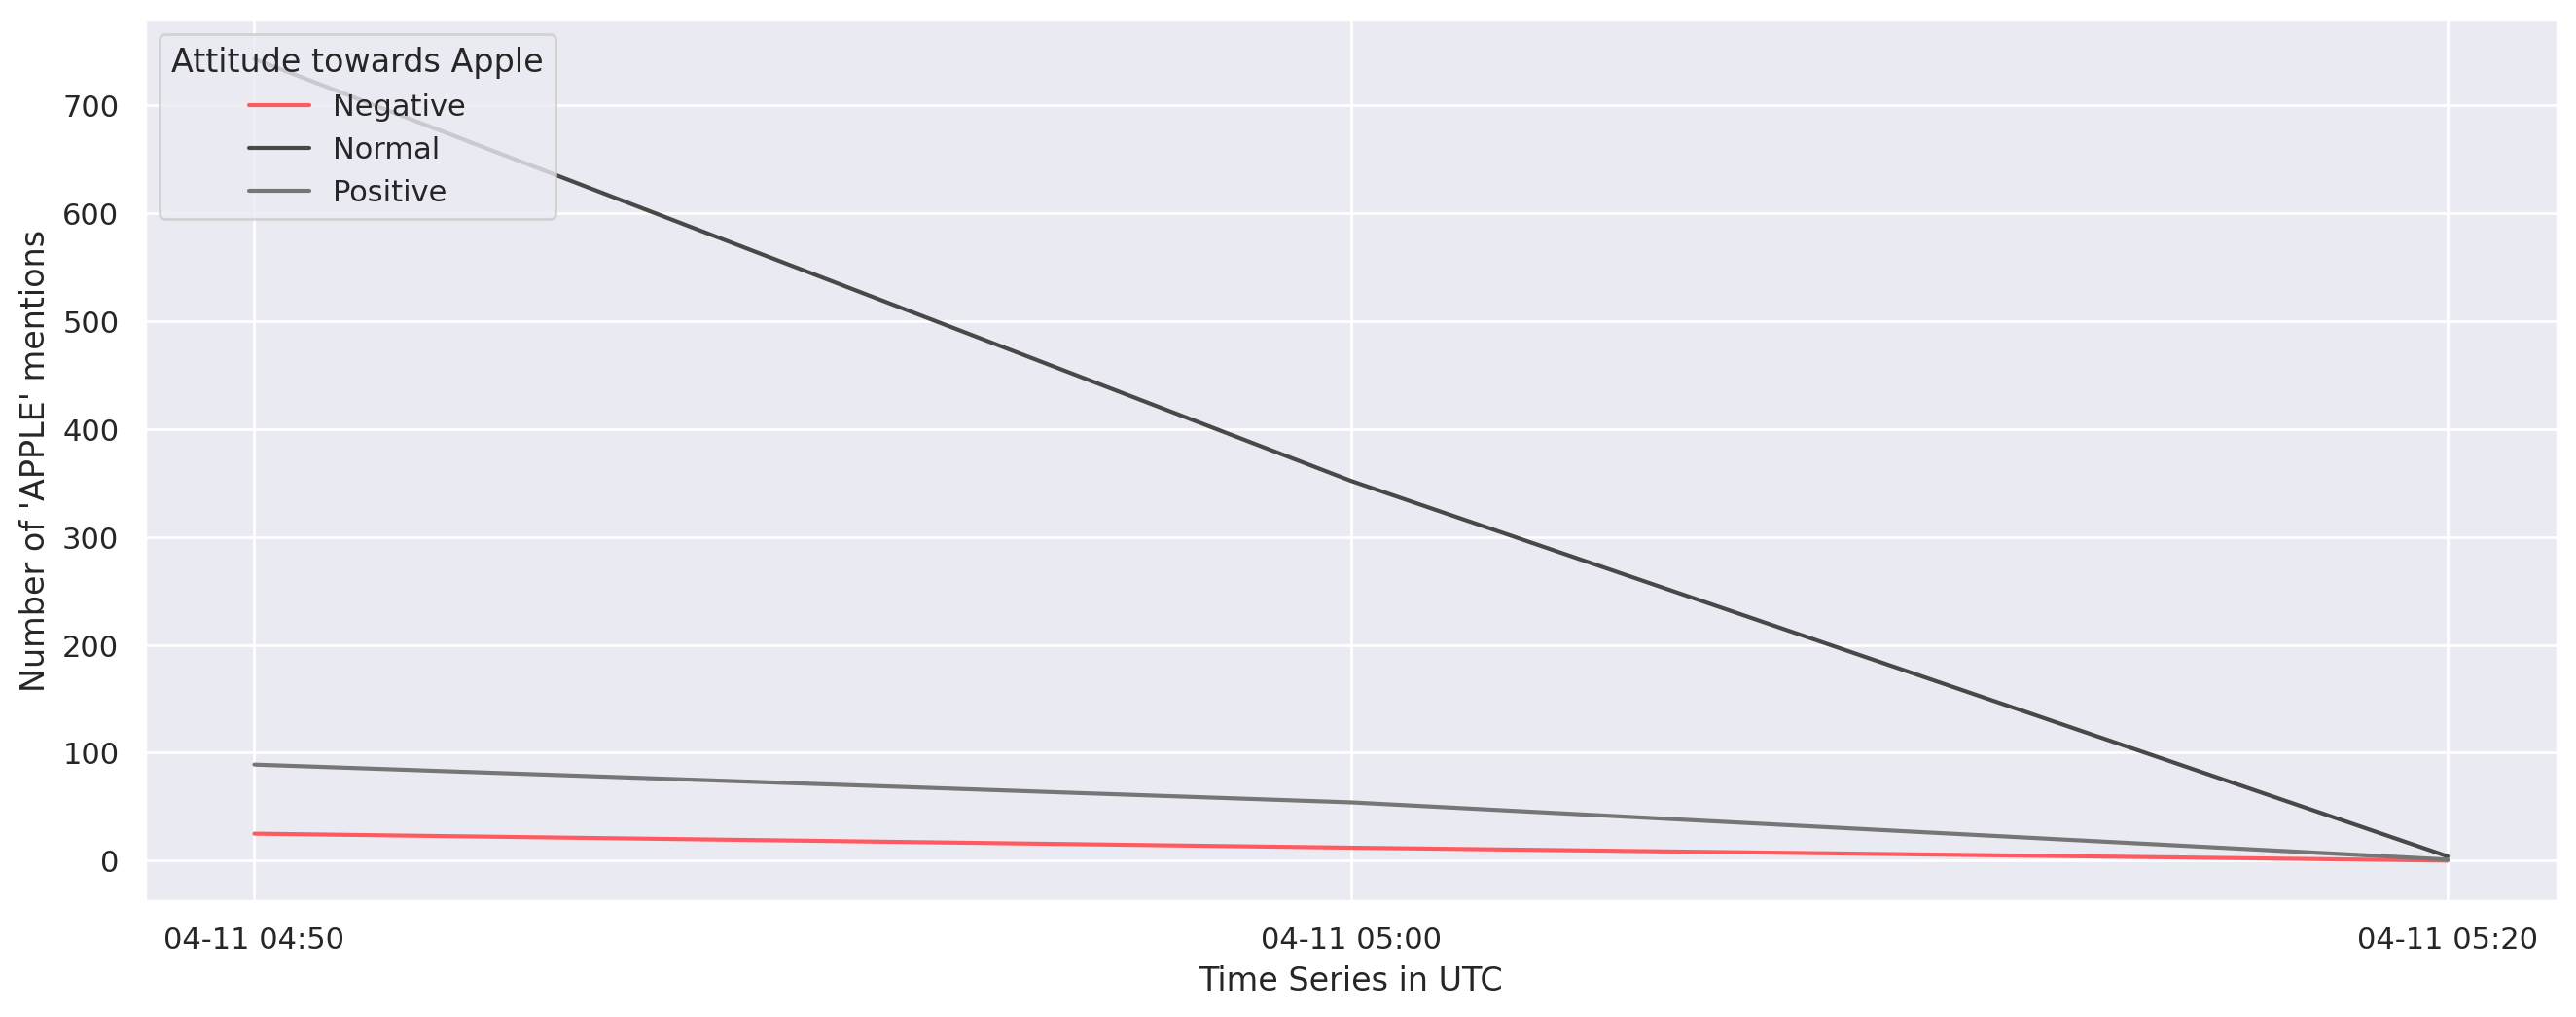

In [12]:
# Load data from MySQL
df = pd.read_sql('SELECT id_str, text, created_at, polarity, user_location FROM {}'.format(settings.TABLE_NAME), con=db_connection)
# UTC for date time at default
df['created_at'] = pd.to_datetime(df['created_at'])
print("Apple Negative Tweets Monitor: ")
for index, tweets in df[df['polarity'] == -1].iterrows():
    print("  " +str(tweets[2]) + "  " + tweets[1])


# Clean and transform data to enable time series
result = df.groupby([pd.Grouper(key='created_at', freq='10min'), 'polarity']).count() \
        .unstack(fill_value=0).stack().reset_index()
result['created_at'] = pd.to_datetime(result['created_at']).apply(lambda x: x.strftime('%m-%d %H:%M'))


# Plot Line Chart for monitoring brand awareness on Twitter
mpl.rcParams['figure.dpi']= 200
plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
ax = sns.lineplot(x = "created_at" ,y="id_str", hue='polarity', data=result,\
                  palette=sns.color_palette(["#FF5A5F","#484848", "#767676"]))
ax.set(xlabel='Time Series in UTC', ylabel="Number of '{}' mentions".format(settings.TRACK_WORDS[0]))
plt.legend(title='Attitude towards Apple', loc='upper left', labels=['Negative', 'Normal', 'Positive'])
sns.set(rc={"lines.linewidth": 1})
plt.show()

In [13]:

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="TweetifyML")
location = geolocator.geocode("Columbus, Oh")
print((location.latitude, location.longitude))
location.address

(39.9622601, -83.0007065)


'Columbus, Franklin County, Ohio, United States'